In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("../Datasets/train.csv")
test_df = pd.read_csv("../Datasets/test.csv")
train_df.drop("Unnamed: 0", axis=1,inplace=True)
test_df.drop("Unnamed: 0", axis=1,inplace=True)
train_df.index = train_df["Date and time"]
test_df.index = test_df["Date and time"]
train_df.drop('Date and time', axis=1, inplace=True)
test_df.drop('Date and time', axis=1, inplace=True)

In [3]:
def create_sequences_per_feature(data, window_size=6):
    X = []
    y = []
    
    # Iterate over each feature (column)
    for feature_index in range(data.shape[1]):
        feature_data = data[:, feature_index]  # Extract the current feature's data
        
        # Create sequences for the current feature
        X_feature = []
        y_feature = []
        for i in range(len(feature_data) - window_size):
            X_feature.append(feature_data[i:i+window_size])  # 6 previous timesteps for the feature
            y_feature.append(feature_data[i+window_size])    # Next timestep for the feature
        
        X.append(np.array(X_feature))
        y.append(np.array(y_feature))
    
    # Stack each feature's sequences together
    X = np.stack(X, axis=-1)  # Shape will be (number_of_samples, window_size, number_of_features)
    y = np.stack(y, axis=-1)  # Shape will be (number_of_samples, number_of_features)
    
    return X, y

window_size = 6
x_train, y_train = create_sequences_per_feature(train_df.values, window_size)
x_test, y_test = create_sequences_per_feature(test_df.values, window_size)

In [4]:
# Define the model
model = Sequential([
    # 1D CNN Layer
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6, x_train.shape[2])),

    # Adjusted LSTM Layers (from your previous models)
    LSTM(64, return_sequences=True),
    LSTM(50, activation='relu'),       # Second LSTM layer with 'relu' activation    
    # Fully connected output layer
    Dense(8)  # Now predicting 8 feature values at once
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             1600      
                                                                 
 lstm (LSTM)                 (None, 4, 64)             33024     
                                                                 
 lstm_1 (LSTM)               (None, 50)                23000     
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                                 
Total params: 58,032
Trainable params: 58,032
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Check the shape of your data
print(f"X_train shape: {x_train.shape}")  # Should be (number_of_samples, 6, 8)
print(f"y_train shape: {y_train.shape}")  # Should be (number_of_samples, 8)

X_train shape: (311911, 6, 8)
y_train shape: (311911, 8)


In [6]:
# Fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_data=(x_test, y_test)).history

Epoch 1/100
4874/4874 [==============================] - 30s 6ms/step - loss: 20.9932 - mape: 4.0139 - val_loss: 2.9070 - val_mape: 2.5387
Epoch 2/100
4874/4874 [==============================] - 29s 6ms/step - loss: 2.8779 - mape: 2.3650 - val_loss: 2.8505 - val_mape: 2.6498
Epoch 3/100
4874/4874 [==============================] - 28s 6ms/step - loss: 2.6205 - mape: 2.2026 - val_loss: 2.6086 - val_mape: 2.3491
Epoch 4/100
4874/4874 [==============================] - 28s 6ms/step - loss: 2.4903 - mape: 2.1185 - val_loss: 2.5712 - val_mape: 2.3846
Epoch 5/100
4874/4874 [==============================] - 29s 6ms/step - loss: 2.3942 - mape: 2.0549 - val_loss: 2.3200 - val_mape: 2.1533
Epoch 6/100
4874/4874 [==============================] - 29s 6ms/step - loss: 2.3130 - mape: 2.0005 - val_loss: 3.0306 - val_mape: 2.6731
Epoch 7/100
4874/4874 [==============================] - 29s 6ms/step - loss: 2.2557 - mape: 1.9702 - val_loss: 2.4032 - val_mape: 2.1863
Epoch 8/100
4874/4874 [==========

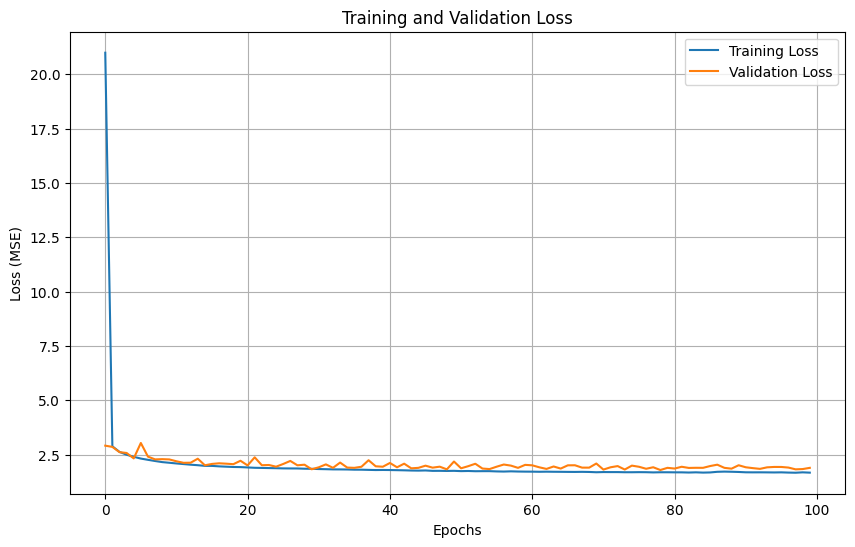

In [12]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


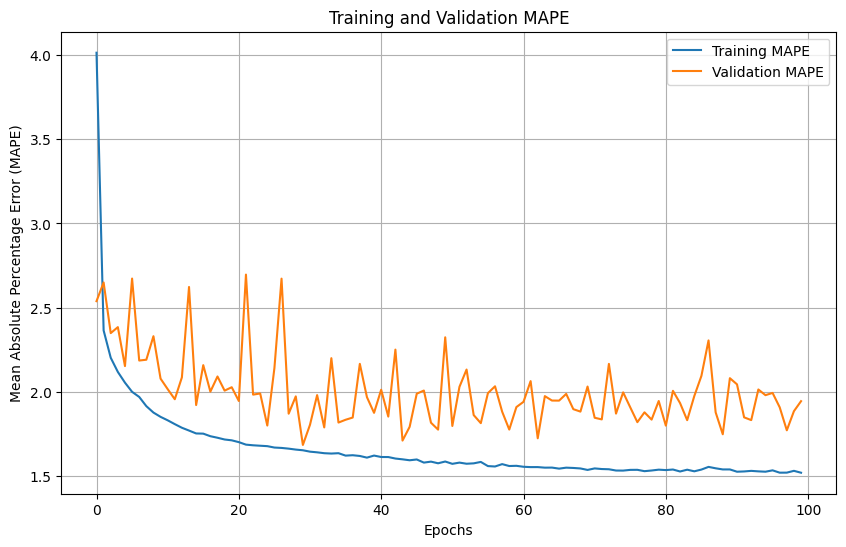

In [13]:
# Plot the training and validation MAPE
plt.figure(figsize=(10, 6))
plt.plot(history['mape'], label='Training MAPE')
plt.plot(history['val_mape'], label='Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Training and Validation MAPE')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# model.save('../Model Files/1D_CNN_LSTM/1d_cnnn_lstm.h5')